In [1]:
#COVID

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
datos3 = pd.read_csv("FallecidosEtario.csv")
datos4 = pd.read_csv("fallecidos_hosp_region.csv", encoding='latin-1',sep = ";")
#Carga de datos y libreria

In [63]:
datos4
# Tabla fallecidos por region 

,fecha_fallecimiento,region_residencia,hospitalizacion,fallecidos
0,19-03-2020,Región de Antofagasta,FALSO,0
1,20-03-2020,Región de Antofagasta,FALSO,0
2,21-03-2020,Región de Antofagasta,FALSO,0
3,23-03-2020,Región de Antofagasta,FALSO,0
4,25-03-2020,Región de Antofagasta,FALSO,0
...,...,...,...,...
4825,24-08-2020,Región Metropolitana de Santiago,VERDADERO,13
4826,25-08-2020,Región Metropolitana de Santiago,VERDADERO,11
4827,26-08-2020,Región Metropolitana de Santiago,VERDADERO,12
4828,27-08-2020,Región Metropolitana de Santiago,VERDADERO,6


In [6]:
datos3.head()
#Tabla Fallecidos por grupo de edad

,Grupo de edad,2020-04-09,2020-04-10,2020-04-11,2020-04-12,2020-04-13,2020-04-14,2020-04-15,2020-04-16,2020-04-17,...,2021-04-23,2021-04-24,2021-04-25,2021-04-26,2021-04-27,2021-04-28,2021-04-29,2021-04-30,2021-05-01,2021-05-02
0,<=39,2,2,3,3,3,3,3,3,4,...,603,610,613,615,616,620,626,629,632,635
1,40-49,1,2,2,2,2,2,2,2,2,...,915,920,924,935,938,940,954,964,971,979
2,50-59,1,2,2,3,3,5,5,6,8,...,2618,2630,2651,2670,2676,2687,2718,2736,2753,2774
3,60-69,9,10,12,12,12,12,12,14,16,...,5330,5354,5380,5410,5424,5434,5466,5496,5520,5541
4,70-79,21,22,24,28,29,30,31,32,36,...,7179,7205,7230,7257,7270,7283,7318,7336,7357,7379


In [7]:
datos3.isnull().any().any()
# Revision nulos

False

In [8]:
datos4.isnull().any().any()
# Revision nulos

False

In [9]:
tipos = datos4.columns.to_series().groupby(datos4.dtypes).groups
ctext = tipos[np.dtype('object')]
columnas = datos4.columns  
cnum = list(set(columnas) - set(ctext))
for columna in cnum:
    mean = datos4["fallecidos"].mean()
    datos4["fallecidos"] = datos4["fallecidos"].fillna(mean)
#Limpieza

In [ ]:
datos4

In [10]:
grupo1 = datos4.groupby(by = "region_residencia")["fallecidos"].sum().reset_index()
# Datos agrupados por region

In [11]:
grupo1

,region_residencia,fallecidos
0,Región Metropolitana de Santiago,8776
1,Región de Antofagasta,453
2,Región de Arica y Parinacota,110
3,Región de Atacama,45
4,Región de Coquimbo,141
5,Región de Los Lagos,71
6,Región de Los Ríos,13
7,Región de Magallanes y la Antártica Chilena,40
8,Región de Tarapacá,205
9,Región de Valparaíso,744


In [12]:
aux = datos3.iloc[:, 0]
datos3 = datos3.iloc[: , 1:]
datos3.columns = pd.to_datetime(datos3.columns) 
datos3.columns = datos3.columns.strftime('%b %Y')
datos3 = datos3.groupby(datos3.columns, axis=1).sum() 
datos3.columns = sorted(datos3.columns, key=pd.to_datetime)
datos3_edad=datos3
datos3_edad.insert(0,'Grupo de edad','')
datos3_edad['Grupo de edad'] = aux
print(datos3_edad)
# Datos ordenados por mes

  Grupo de edad  Apr 2020  May 2020  Jun 2020  Jul 2020  Aug 2020  Sep 2020  \
0          <=39        94     17385      7293     11206     12333     12254   
1         40-49        81     26083     11032     16651     18470     18364   
2         50-59       214     74984     33751     49553     53772     53677   
3         60-69       479    154502     69404    104408    113542    113068   
4         70-79       906    209003     91222    139607    154350    152715   
5         80-89       977    191686     81366    128221    142414    140013   
6          >=90       278     70983     29717     46180     51881     50847   

   Oct 2020  Nov 2020  Dec 2020  Jan 2021  Feb 2021  Mar 2021  Apr 2021  \
0      5199      2354     15337       348      1267      9976      9363   
1      7978      3485     22860       816      1950     14977     14199   
2     24322      9896     66126      1394      5527     44663     42379   
3     51054     20672    139401      2741     11061     93779     8

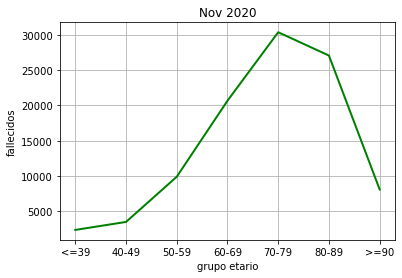

In [60]:

def graficar_mes(mes):
    meses = {1: "Apr 2020",
             2: "May 2020",
             3: "Jun 2020",
             4: "Jul 2020", 
             5: "Aug 2020", 
             6: "Sep 2020",
             7: "Oct 2020",
             8: "Nov 2020",
             9: "Dec 2020",
             10: "Jan 2021",
             11: "Feb 2021",
             12: "Mar 2021", 
             13: "Apr 2021"}
    plt.plot(datos3["Grupo de edad"],datos3[meses[mes]],color="green",linewidth=2,linestyle="-")
    plt.title(meses[mes])
    plt.xlabel("grupo etario")
    plt.ylabel("fallecidos")
    plt.grid(True)
graficar_mes(8)
# funcion que graficas segun mes 
# Estan agrupados por mes para que la grafica se entienda mejor.

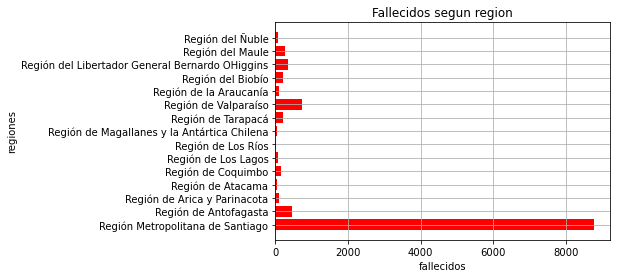

In [14]:
plt.barh(grupo1["region_residencia"],grupo1["fallecidos"],color="red")
plt.title("Fallecidos segun region")
plt.xlabel("fallecidos")
plt.ylabel("regiones")
plt.grid(True)
plt.show()
# Grafica fallecidos por region

In [15]:
# GRIPE

In [98]:
datos5 = pd.read_csv("DEFUNCIONES_FUENTE_DEIS_2016_2021_29042021.csv",encoding='latin-1',sep = ";")
datos5.isnull().any().any()


True

In [99]:
del datos5["Unnamed: 18"]
del datos5["Unnamed: 19"]
del datos5["Unnamed: 20"]
del datos5["Unnamed: 21"]
del datos5["Unnamed: 22"]
del datos5["Unnamed: 23"]
del datos5["Unnamed: 24"]
del datos5["Unnamed: 25"]
#Eliminacion de columnas sin relevancia


In [101]:
datos5["muertefecha"] = 1

In [102]:
datos5

,2021,2021-03-24,Mujer,1,82,2101,Antofagasta,De Antofagasta,C19X,C00-D48,Tumores [Neoplasias],C15-C26,Tumores malignos de los órganos digestivos,C19,Tumor maligno de la unión rectosigmoidea,C19X.1,TUMOR MALIGNO DE LA UNIÓN RECTOSIGMOIDEA,,muertefecha
0,2021,2021-02-16,Hombre,1,81,10202,Ancud,De Los Lagos,C64X,C00-D48,Tumores [Neoplasias],C64-C68,Tumores malignos de las vías urinarias,C64,"Tumor maligno del riñón, excepto de la pelvis ...",C64X,TUMOR MALIGNO DEL RIÑÓN EXCEPTO DE LA PELVIS R...,NaN,1
1,2021,2021-04-03,Mujer,1,87,7301,Curicó,Del Maule,K254,K00-K93,Enfermedades del sistema digestivo,K20-K31,"Enfermedades del esófago, del estómago y del d...",K25,Úlcera gástrica,K254,ULCERA GASTRICA CRONICA O NO ESPECIFICADA CON ...,NaN,1
2,2021,2021-03-12,Hombre,1,89,8112,Hualpén,Del Bíobío,U071,U00-U99,Códigos para propósitos especiales,U00-U49,Asignación provisoria de nuevas afecciones de ...,U07,Uso emergente de U07,U071,COVID-19 virus identificado,NaN,1
3,2021,2021-03-24,Hombre,1,79,1405,Pica,De Tarapacá,C33X,C00-D48,Tumores [Neoplasias],C30-C39,Tumores malignos de los órganos respiratorios ...,C33,Tumor maligno de la tráquea,C33X,TUMOR MALIGNO DE LA TRÁQUEA,,1
4,2021,2021-03-10,Hombre,1,82,8107,Penco,Del Bíobío,K920,K00-K93,Enfermedades del sistema digestivo,K90-K93,Otras enfermedades del sistema digestivo,K92,Otras enfermedades del sistema digestivo,K920,HEMATEMESIS,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
597122,2016,2016-08-28,Mujer,1,74,10103,Cochamó,De Los Lagos,E119,E00-E90,"Enfermedades endocrinas, nutricionales y metab...",E10-E14,Diabetes mellitus,E11,Diabetes mellitus no insulinodependiente,E119,DIABETES MELLITUS NO INSULINODEPENDIENTE SIN M...,NaN,1
597123,2016,2016-08-30,Mujer,1,86,10209,Quemchi,De Los Lagos,J449,J00-J99,Enfermedades del sistema respiratorio,J40-J47,Enfermedades crónicas de las vías respiratoria...,J44,Otras enfermedades pulmonares obstructivas cró...,J449,ENFERMEDAD PULMÓNAR OBSTRUCTIVA CRONICA NO ESP...,NaN,1
597124,2016,2016-08-26,Hombre,1,84,10205,Dalcahue,De Los Lagos,C61X,C00-D48,Tumores [Neoplasias],C60-C63,Tumores malignos de los órganos genitales masc...,C61,Tumor maligno de la próstata,C61X,TUMOR MALIGNO DE LA PRÓSTATA,NaN,1
597125,2016,2016-09-02,Mujer,1,90,10205,Dalcahue,De Los Lagos,J459,J00-J99,Enfermedades del sistema respiratorio,J40-J47,Enfermedades crónicas de las vías respiratoria...,J45,Asma,J459,ASMA NO ESPECIFICADO,NaN,1


In [105]:
datos5 = datos5.loc[datos5['Tumores malignos de los órganos digestivos'] == "Influenza [gripe] y neumonía"]
datos5
#Base de datos solo de los fallecidos por influenza(gripe) o neumonia

,2021,2021-03-24,Mujer,1,82,2101,Antofagasta,De Antofagasta,C19X,C00-D48,Tumores [Neoplasias],C15-C26,Tumores malignos de los órganos digestivos,C19,Tumor maligno de la unión rectosigmoidea,C19X.1,TUMOR MALIGNO DE LA UNIÓN RECTOSIGMOIDEA,,muertefecha
97,2021,2021-02-26,Hombre,1,81,13103,Cerro Navia,Metropolitana de Santiago,J189,J00-J99,Enfermedades del sistema respiratorio,J09-J18,Influenza [gripe] y neumonía,J18,"Neumonía, organismo no especificado",J189,NEUMONIA NO ESPECIFICADA,NaN,1
112,2021,2021-04-23,Hombre,1,84,13124,Pudahuel,Metropolitana de Santiago,J181,J00-J99,Enfermedades del sistema respiratorio,J09-J18,Influenza [gripe] y neumonía,J18,"Neumonía, organismo no especificado",J181,NEUMONIA LOBAR NO ESPECIFICADA,,1
124,2021,2021-02-23,Hombre,1,78,13401,San Bernardo,Metropolitana de Santiago,J189,J00-J99,Enfermedades del sistema respiratorio,J09-J18,Influenza [gripe] y neumonía,J18,"Neumonía, organismo no especificado",J189,NEUMONIA NO ESPECIFICADA,NaN,1
174,2021,2021-01-27,Hombre,1,89,9206,Los Sauces,De La Araucanía,J182,J00-J99,Enfermedades del sistema respiratorio,J09-J18,Influenza [gripe] y neumonía,J18,"Neumonía, organismo no especificado",J182,NEUMONIA HIPOSTATICA NO ESPECIFICADA,NaN,1
265,2021,2021-02-16,Mujer,1,93,5601,San Antonio,De Valparaíso,J189,J00-J99,Enfermedades del sistema respiratorio,J09-J18,Influenza [gripe] y neumonía,J18,"Neumonía, organismo no especificado",J189,NEUMONIA NO ESPECIFICADA,,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
596935,2016,2016-08-30,Mujer,1,102,9101,Temuco,De La Araucanía,J189,J00-J99,Enfermedades del sistema respiratorio,J09-J18,Influenza [gripe] y neumonía,J18,"Neumonía, organismo no especificado",J189,NEUMONIA NO ESPECIFICADA,NaN,1
596978,2016,2016-08-31,Hombre,1,81,9103,Cunco,De La Araucanía,J189,J00-J99,Enfermedades del sistema respiratorio,J09-J18,Influenza [gripe] y neumonía,J18,"Neumonía, organismo no especificado",J189,NEUMONIA NO ESPECIFICADA,NaN,1
597059,2016,2016-08-29,Mujer,1,96,10301,Osorno,De Los Lagos,J189,J00-J99,Enfermedades del sistema respiratorio,J09-J18,Influenza [gripe] y neumonía,J18,"Neumonía, organismo no especificado",J189,NEUMONIA NO ESPECIFICADA,NaN,1
597070,2016,2016-08-31,Hombre,1,84,10301,Osorno,De Los Lagos,J189,J00-J99,Enfermedades del sistema respiratorio,J09-J18,Influenza [gripe] y neumonía,J18,"Neumonía, organismo no especificado",J189,NEUMONIA NO ESPECIFICADA,NaN,1


In [106]:
grup6 = datos5.groupby(by = "2021-03-24")["muertefecha"].sum().reset_index()
# Agrupados por fecha y la cantidad de fallecidos en cada una de estas

In [107]:
grup6

,2021-03-24,muertefecha
0,2016-01-01,5
1,2016-01-02,5
2,2016-01-03,7
3,2016-01-04,15
4,2016-01-05,6
...,...,...
1937,2021-04-23,5
1938,2021-04-24,7
1939,2021-04-25,6
1940,2021-04-26,3


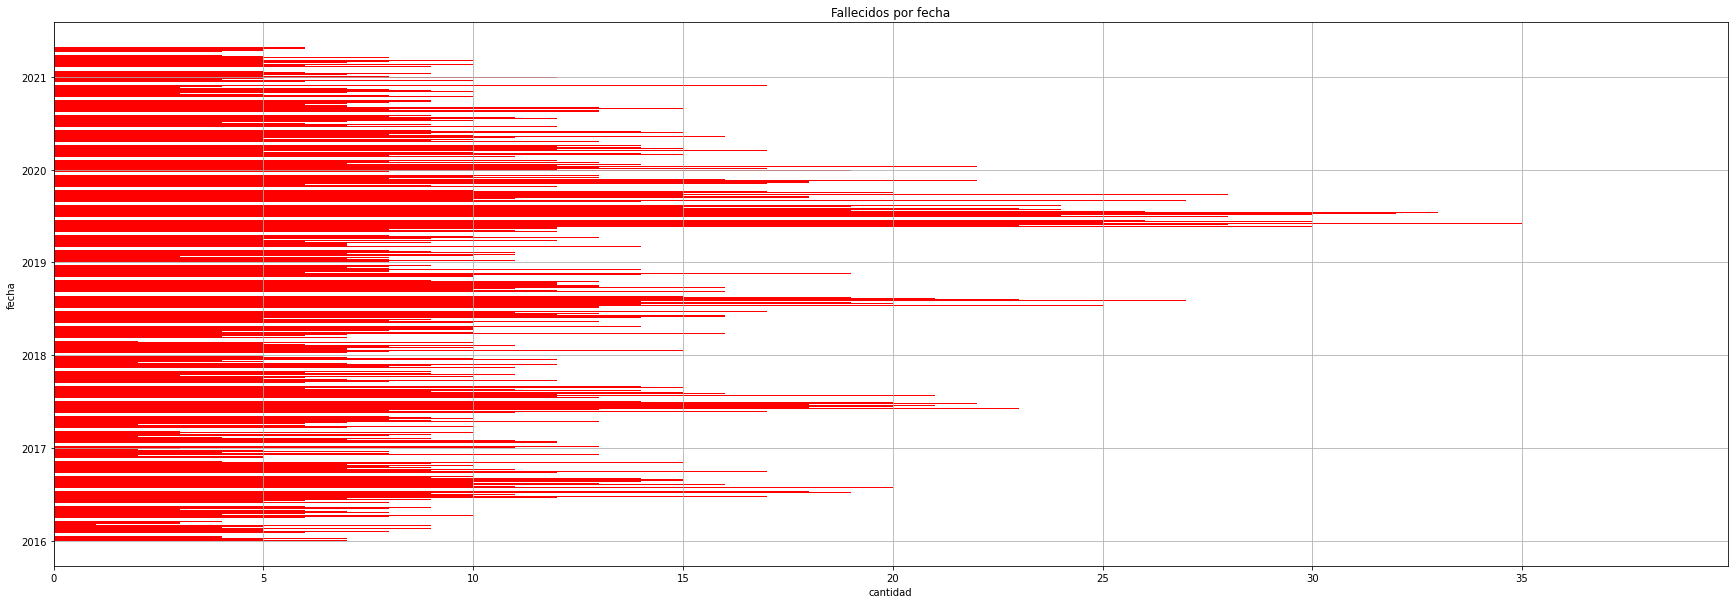

In [112]:
plt.barh(grup6["2021-03-24"],grup6["muertefecha"],color="red")
plt.title("Fallecidos por fecha")
plt.xlabel("cantidad")
plt.ylabel("fecha")
plt.grid(True)
plt.rcParams["figure.figsize"] = (30,10)
plt.show()
#Grafico de cantidadfallecidos por dias.

se puede concluir que la cantidad de fallecidos por covid es muy superior al de la gripe, Por lo tanto el presidente
de estados unidos juntos a un grupo de gente estaban equivocado ante su afirmacion al decir que solamente era una gripe ya que los mismos datos dejan en evidencia que esto no es asi, al ser el covid una enfermedad mucho mas contagioso y dificil de controlar que una gripe nomarl
